# **CSC8635 Machine Learning Assignment**

### **Name**: Dimitrios Poulimenos - 200291237 (Extension Granded)

### **Project 1**: (1) Tabular

### **Project 2**: (3) Text

**CSC8635 Coursework Specification**

For this coursework you will attempt **TWO** of the four longer project-style questions. All of the project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

# Project 3: Text dataset (50 marks)

Dataset: sentiment analysis dataset (on canvas:
(https://ncl.instructure.com/courses/53509/files/7666186?wrap=1),
(https://ncl.instructure.com/courses/53509/files/7666193?wrap=1),
(https://ncl.instructure.com/courses/53509/files/7666197?wrap=1)).

Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.

## **Introduction**

In this project, I will be analyzing data extracted from Twitter, focusing on tweets about a specific airline company. The primary goal is to tune a variety of classification models that can accurately predict the sentiment of each tweet, classifying them as negative, neutral, or positive. To achieve this, the project will involve extensive preprocessing of the text data, ensuring it is suitably prepared for the classification task. I will utilize three datasets: Tweets_train.csv, Tweets_dev.csv, and Tweets_test.csv, each serving a distinct purpose in the analysis process. Tweets_train.csv will be used for training the model, Tweets_dev.csv for validating and fine-tuning it, and Tweets_test.csv for evaluating its performance on unseen data. 

To begin this report, it's essential to import all the essential libraries. These libraries will provide the tools and functions needed for the upcoming analysis, setting the stage for an efficient and comprehensive evaluation.


## **Libraries**

In [49]:
# Importing the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras_tuner import RandomSearch
from joblib import dump


Once all the required libraries are successfully imported, the subsequent step involves loading the data. This process will prepare and make available the dataset for the analysis that follows, ensuring we have a solid foundation for our work.

## **Load the Data**

In [2]:
# Loading the data
tweets_train = pd.read_csv('Tweets_train.csv', header=0)
tweets_validation = pd.read_csv('Tweets_dev.csv', header=0)
tweets_test = pd.read_csv('Tweets_test.csv', encoding='iso-8859-1', header=0)

Now equipped with the data, we move on to the crucial phase of exploratory data analysis (EDA). This step will unveil vital information about the dataset and yield insightful observations. These insights are instrumental in guiding the subsequent stages of our analysis, ensuring a data-driven and informed approach.

## **Exploratory Data Analysis (EDA)**

**Basic Information of the Datasets**

In [3]:
# Basic information of the datasets
print("\nTraining Data Info:")
tweets_train.info()
print("\n")
print("\nValidation Data Info:")
tweets_validation.info()
print("\n")
print("\nTest Data Info:")
tweets_test.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB



Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1318 non-null   int64 
 1   text               1318 non-null   object
 2   airline_sentiment  1318 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB



Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dt

The datasets, as outlined above, uniformly consist of three columns: tweet_id, text, and airline_sentiment. Notably, the absence of missing values in these datasets eliminates the need for data imputation or adjustments related to data completeness in the preprocessing phase. Additionally, considering the focus of our analysis, the 'tweet_id' column may not hold significant relevance and could be considered for removal in the subsequent stages to streamline the dataset further for our specific analytical objectives. In order to validate that there are no missing values in the datasets I am going to check with the following code.

In [4]:
# Check for missing values
print("\nMissing values in Training Data:")
print(tweets_train.isnull().sum())

print("\nMissing values in Validation Data:")
print(tweets_validation.isnull().sum())

print("\nMissing values in Test Data:")
print(tweets_test.isnull().sum())


Missing values in Training Data:
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

Missing values in Validation Data:
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

Missing values in Test Data:
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64


Let's now delve into a detailed examination of the dataset to better understand its content and structure. This step will provide a clearer view of the data we are working with, setting the stage for more informed analytical decisions.

**Data Inspection**

In [5]:
# Display the head of the datasets
print("Training Data:")
print(tweets_train.head())
print("\n")
print("\nValidation Data:")
print(tweets_validation.head())
print("\n")
print("\nTest Data:")
print(tweets_test.head())

Training Data:
             tweet_id                                               text  \
0  569179849518161920                    @united you're good. Thank you!   
1  569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2  568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3  569525116725567491  @USAirways The automated message isn't helpful...   
4  568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   

  airline_sentiment  
0          positive  
1          negative  
2          positive  
3          negative  
4          positive  



Validation Data:
             tweet_id                                               text  \
0  568107472260624384  @southwestair Great job celebrating #MardiGras...   
1  568215698524246016  @southwestair thanks for taking it up a notch!...   
2  567842466851905536  @USAirways Being put back on hold for what has...   
3  568834824410148864  @united Thank you for your offer! All sorted o...

Observing the current state of the dataset, it's evident that the 'text' column requires cleaning and refinement to enhance its suitability for the sentiment analysis. Furthermore, the 'airline_sentiment' column, currently in text format, might benefit from conversion to a numerical format. Such a transformation is anticipated to facilitate more efficient model performance, as numerical representations often align better with algorithmic processing in predictive modeling. Having all the above in mind now it is time to visualise the distribution of each sentiment across the datasets.

**Sentiment Distribution**

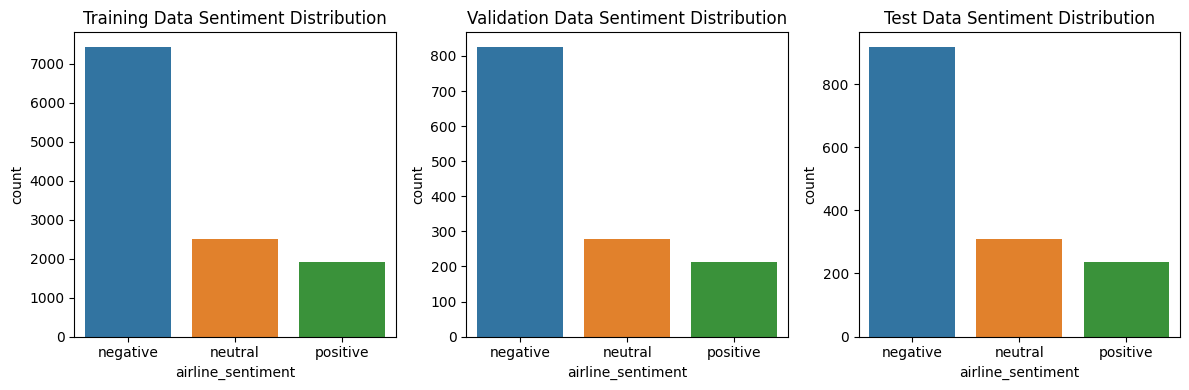

In [6]:
# Set the correct order
sentiment_order = ["negative", "neutral", "positive"]

# Extract the first three colors from the Seaborn palette
palette = sns.color_palette()[:3]

# Create a color mapping for the sentiment categories
color_mapping = dict(zip(sentiment_order, palette))

plt.figure(figsize=(12, 4))

# Training Data
plt.subplot(1, 3, 1)
sns.countplot(x='airline_sentiment', data=tweets_train, hue="airline_sentiment", order=sentiment_order, palette=color_mapping)
plt.title('Training Data Sentiment Distribution')

# Validation Data
plt.subplot(1, 3, 2)
sns.countplot(x='airline_sentiment', data=tweets_validation, hue="airline_sentiment", order=sentiment_order, palette=color_mapping)
plt.title('Validation Data Sentiment Distribution')

# Test Data
plt.subplot(1, 3, 3)
sns.countplot(x='airline_sentiment', data=tweets_test, hue="airline_sentiment", order=sentiment_order, palette=color_mapping)
plt.title('Test Data Sentiment Distribution')

plt.tight_layout()
plt.show()



The plots clearly illustrate that the negative sentiment is the predominant category across all datasets. This observation is crucial, especially in the context of training predictive models. To address this imbalance and ensure robust model performance, it's necessary to upsample the positive and neutral sentiments in the training dataset. Upsampling will help in creating a more balanced distribution of sentiments, which is essential for preventing model bias towards the negative sentiment and for enhancing the model's ability to accurately predict across all sentiment categories.

Building upon the valuable insights gained from the exploratory data analysis, we now transition to the data preprocessing phase. This critical stage involves tailoring the dataset to align with our analysis objective: predicting the categories of the 'airline_sentiment' class through sentiment analysis of the text data. This preparation will ensure that the dataset is optimally structured and refined for accurate sentiment prediction.

## **Data Preprocessing**

The process begins by transforming all text characters to lowercase, a step that promotes uniformity and simplifies further analysis. Following this, the function meticulously removes any web URLs, recognizing their usual irrelevance in sentiment analysis. Additionally, it eliminates user mentions (such as @username) and hashtags, which are standard in social media texts but often superfluous for our analysis. Moreover, it also strips away punctuation marks and numbers, thereby sharpening the focus solely on words, the core units of our analysis. The text is then tokenized, breaking it down into individual words, and each word undergoes lemmatization. This process converts words to their base or dictionary forms, ensuring that variations of a word are treated as a single entity. Finally, the function filters out stopwords—common words like 'the', 'is', and 'in'. These words, while integral in language, offer little value in sentiment analysis and are thus removed to streamline the analysis process.

**Text Preprocessing for NLP Analysis**

In [7]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)

    # Remove punctuations and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize and Lemmatize
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(filtered_tokens)

# Applying the preprocessing function to the datasets
tweets_train['text'] = tweets_train['text'].apply(preprocess_text)
tweets_validation['text'] = tweets_validation['text'].apply(preprocess_text)
tweets_test['text'] = tweets_test['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dimitris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dimitris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dimitris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing Redundant Data**

In this step, I'm removing the "tweet_id" column as it's not needed for the later stages of modeling. This helps focus on the data that's important for our analysis.

In [8]:
# Remove 'tweet_id' column from tweets_train
tweets_train = tweets_train.drop('tweet_id', axis=1)

# Remove 'tweet_id' column from tweets_validation
tweets_validation = tweets_validation.drop('tweet_id', axis=1)

# Remove 'tweet_id' column from tweets_test
tweets_test = tweets_test.drop('tweet_id', axis=1)

# Display the first few rows to verify the columns are removed
print("Train Head:\n", tweets_train.head())
print("\nValidation Head:\n", tweets_validation.head())
print("\nTest Head:\n", tweets_test.head())

Train Head:
                                                 text airline_sentiment
0                                         good thank          positive
1  way ruin vacation brother called night multipl...          negative
2  yes thankfully catering got loading frustrated...          positive
3  automated message helpful impossible speak hum...          negative
4    makingloveoutofnothingatall brandloveaffair lax          positive

Validation Head:
                                                 text airline_sentiment
0  great job celebrating mardigras industry anoth...          positive
1  thanks taking notch leinenkugels craftbeer goo...          positive
2         put back hold hour completely unacceptable          negative
3                                 thank offer sorted          positive
4  wondering possible colleague get earlier fligh...           neutral

Test Head:
                                                 text airline_sentiment
0                               

**Label Encoding of Sentiment Categories**

Below, I am utilizing label encoding through a mapping technique. This approach guarantees that each sentiment is accurately assigned to the correct numerical label, maintaining the intended order.

In [9]:
# Define the mapping
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Apply the mapping to the 'airline_sentiment' column in each dataset
tweets_train['airline_sentiment'] = tweets_train['airline_sentiment'].map(sentiment_mapping)
tweets_validation['airline_sentiment'] = tweets_validation['airline_sentiment'].map(sentiment_mapping)
tweets_test['airline_sentiment'] = tweets_test['airline_sentiment'].map(sentiment_mapping)

Now let's display the data to check if the label encoding applied.

In [10]:
# Display the first few rows to verify the label encoding
print("Train Head:\n", tweets_train.head())
print("\nValidation Head:\n", tweets_validation.head())
print("\nTest Head:\n", tweets_test.head())

Train Head:
                                                 text  airline_sentiment
0                                         good thank                  2
1  way ruin vacation brother called night multipl...                  0
2  yes thankfully catering got loading frustrated...                  2
3  automated message helpful impossible speak hum...                  0
4    makingloveoutofnothingatall brandloveaffair lax                  2

Validation Head:
                                                 text  airline_sentiment
0  great job celebrating mardigras industry anoth...                  2
1  thanks taking notch leinenkugels craftbeer goo...                  2
2         put back hold hour completely unacceptable                  0
3                                 thank offer sorted                  2
4  wondering possible colleague get earlier fligh...                  1

Test Head:
                                                 text  airline_sentiment
0                  

With label encoding successfully implemented, our next step addresses the imbalance in the training dataset. Our exploratory data analysis revealed a predominant presence of negative sentiments, exceeding 7,000 instances. To ensure a fair and effective training process, it's crucial to upsample the less represented sentiment categories, specifically "positive" and "neutral". This approach will balance the dataset, providing a more equitable foundation for training our models.

In [11]:
# Handling Imbalanced Data (For Training Data)
# Separate majority and minority classes
df_majority = tweets_train[tweets_train.airline_sentiment==0]
df_minority_positive = tweets_train[tweets_train.airline_sentiment==2]
df_minority_neutral = tweets_train[tweets_train.airline_sentiment==1]

# Upsample minority class
df_minority_positive_upsampled = resample(df_minority_positive,
                                         replace=True,
                                         n_samples=len(df_majority),
                                         random_state=123)

df_minority_neutral_upsampled = resample(df_minority_neutral,
                                         replace=True,
                                         n_samples=len(df_majority),
                                         random_state=123)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_positive_upsampled, df_minority_neutral_upsampled])

In [12]:
# New class counts
print(df_upsampled.airline_sentiment.value_counts())

airline_sentiment
0    7434
2    7434
1    7434
Name: count, dtype: int64


Having balanced the sentiment categories, we now proceed to vectorize the already segregated datasets: training, validation, and testing. This step is essential for transforming the text data into a numerical format, facilitating effective model training and evaluation across all three pre-split datasets.

**Tokenization**

In [13]:
all_words = []

for text in df_upsampled['text']:
    tokens = word_tokenize(text)
    all_words.extend(tokens)

# Count unique words using a set
unique_words = set(all_words)

print("Total number of unique words:", len(unique_words))


Total number of unique words: 9112


In our training dataset, we have identified a total of 9112 unique words. During the vectorization process, I'll set max_features to 7000. This represents approximately 76.82% of the unique words in the dataset. By selecting this specific number of features, I aim to strike a balance between capturing the essence of our data and reducing its dimensionality. This dimensionality reduction is a strategic decision to enhance the efficiency and performance of our forthcoming modeling efforts.

**TF-IDF Vectorization**

In [14]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=7000)

# Fit and transform the text data
X_train = vectorizer.fit_transform(df_upsampled['text'])
y_train = df_upsampled['airline_sentiment']

X_validation = vectorizer.transform(tweets_validation['text'])
y_validation = tweets_validation['airline_sentiment']

X_test = vectorizer.transform(tweets_test['text'])
y_test = tweets_test['airline_sentiment']

## **Shallow Classifiers**


In this approach, I'm conducting a thorough evaluation of two shallow classifiers: Logistic Regression and Naive Bayes. Initially, I'll assess how these classifiers perform on training and validation data without any hyperparameter tuning. This preliminary step provides a baseline understanding of each model's capabilities. Following this, I'll employ GridSearch to meticulously search for the optimal hyperparameters for each model. Once the best hyperparameters are identified, I'll refit the models with these parameters and evaluate their performance using Cross-Validation on the training data. This step is crucial for understanding how well the models generalize. After refining the models with the best hyperparameters, I will then re-evaluate their performance on the validation data. This re-evaluation allows me to see the impact of the tuning process on the model's ability to handle data it hasn't seen before. Finally, the performance of these tuned models will be tested on completely unseen (test) data. This ultimate test will provide insights into the models' true predictive capabilities in real-world scenarios.

This same comprehensive evaluation process is not just limited to the shallow classifiers, it is also applied to two ensemble classifiers I'm working with: Random Forest and XGBoost.

### **Logistic Regression**

**Untuned Model**

In [15]:
# Define the logistic regression model
lr_model = LogisticRegression(max_iter=5000)

# Define K-Fold for cross-validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

lr_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_val_pred_lr_untuned = lr_model.predict(X_validation)
y_train_pred_lr_untuned = lr_model.predict(X_train)

lr_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_lr_untuned) * 100
lr_untuned_train_precision = precision_score(y_train, y_train_pred_lr_untuned, average='weighted') * 100
lr_untuned_train_recall = recall_score(y_train, y_train_pred_lr_untuned, average='weighted') * 100
lr_untuned_train_f1 = f1_score(y_train, y_train_pred_lr_untuned, average='weighted') * 100

lr_untuned_val_accuracy = accuracy_score(y_validation, y_val_pred_lr_untuned) * 100
lr_untuned_val_precision = precision_score(y_validation, y_val_pred_lr_untuned, average='weighted') * 100
lr_untuned_val_recall = recall_score(y_validation, y_val_pred_lr_untuned, average='weighted') * 100
lr_untuned_val_f1 = f1_score(y_validation, y_val_pred_lr_untuned, average='weighted') * 100

print(f"Accuracy of training set (Untuned LR): {lr_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned LR): {lr_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned LR): {lr_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned LR): {lr_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned LR): {lr_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned LR): {lr_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned LR): {lr_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned LR): {lr_untuned_val_f1:.2f}%")

Accuracy of training set (Untuned LR): 90.70%
Precision of training set (Untuned LR): 90.70%
Recall of training set (Untuned LR): 90.70%
F1 Score of training set (Untuned LR): 90.69%


Accuracy of validation set (Untuned LR): 74.96%
Precision of validation set (Untuned LR): 76.69%
Recall of validation set (Untuned LR): 74.96%
F1 Score of validation set (Untuned LR): 75.61%


**Hyperparameters Tuning**

In [16]:
# Define the parameter grid
param_grid = { 
    'C': np.arange(0.1, 2, 0.1),
    'penalty':['l2'],
    'solver': ['sag','saga','newton-cg']
}

# Create GridSearchCV
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=kfold, scoring='accuracy')

# Perform the grid search
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)

Best Parameters for Logistic Regression:  {'C': 1.9000000000000001, 'penalty': 'l2', 'solver': 'saga'}


**Cross Validation**

In [17]:
# Get the best model found by GridSearchCV
best_model_lr = grid_search_lr.best_estimator_

# Perform cross-validation
cv_scores_lr = cross_val_score(best_model_lr, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the results of cross-validation
print("Cross-Validation Scores for Best Logistic Regression Model:")
for i, score in enumerate(cv_scores_lr, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"Average Score: {cv_scores_lr.mean():.4f}")
print(f"Standard Deviation of Scores: {cv_scores_lr.std():.4f}")

Cross-Validation Scores for Best Logistic Regression Model:
  Fold 1: 0.8720
  Fold 2: 0.8725
  Fold 3: 0.8628
  Fold 4: 0.8650
  Fold 5: 0.8635
Average Score: 0.8671
Standard Deviation of Scores: 0.0042


In [18]:
# Saving the model
dump(best_model_lr, 'logisticregression_model.joblib')

['logisticregression_model.joblib']

**Tuned Model Evaluation on Validation Data**

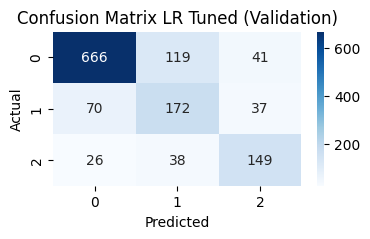



Accuracy of validation set (Logistic Regression Tuned): 74.89%
Precision of validation set (Logistic Regression Tuned): 76.45%
Recall of validation set (Logistic Regression Tuned): 74.89%
F1 Score of validation set (Logistic Regression Tuned): 75.49%


In [60]:
# Evaluate on validation set using the best model
y_val_pred_lr = best_model_lr.predict(X_validation)

lr_val_accuracy = accuracy_score(y_validation, y_val_pred_lr) * 100
lr_val_precision = precision_score(y_validation, y_val_pred_lr, average='weighted') * 100
lr_val_recall = recall_score(y_validation, y_val_pred_lr, average='weighted') * 100
lr_val_f1 = f1_score(y_validation, y_val_pred_lr, average='weighted') * 100

print("\n")

# Confusion Matrix
cm_lr = confusion_matrix(y_validation, y_val_pred_lr)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LR Tuned (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

print(f"Accuracy of validation set (Logistic Regression Tuned): {lr_val_accuracy:.2f}%")
print(f"Precision of validation set (Logistic Regression Tuned): {lr_val_precision:.2f}%")
print(f"Recall of validation set (Logistic Regression Tuned): {lr_val_recall:.2f}%")
print(f"F1 Score of validation set (Logistic Regression Tuned): {lr_val_f1:.2f}%")

**Tuned Model Evaluation on Test Data**

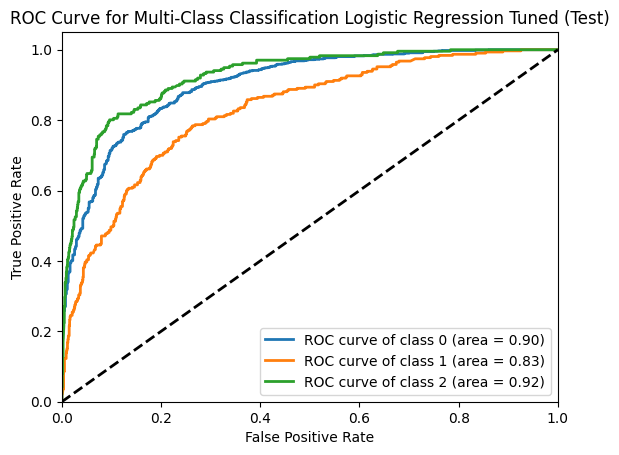



Classification Report for tuned Logistic Regression (Test):
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       918
           1       0.53      0.64      0.58       310
           2       0.66      0.70      0.68       236

    accuracy                           0.76      1464
   macro avg       0.69      0.72      0.70      1464
weighted avg       0.78      0.76      0.76      1464





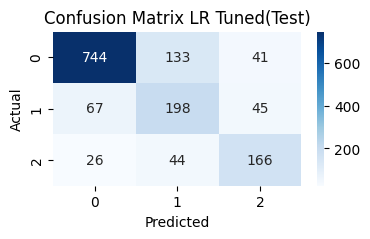



Accuracy of test set (Logistic Regression Tuned): 75.68%
Precision of test set (Logistic Regression Tuned): 77.54%
Recall of test set (Logistic Regression Tuned): 75.68%
F1 Score of test set (Logistic Regression Tuned): 76.37%
Mean ROC AUC Score of test set (Logistic Regression Tuned): 88.38%


In [61]:
# Evaluate on validation set using the best model
y_test_pred_lr = best_model_lr.predict(X_test)

# Calculate Metrics
lr_test_accuracy = accuracy_score(y_test, y_test_pred_lr) * 100
lr_test_precision = precision_score(y_test, y_test_pred_lr, average='weighted') * 100
lr_test_recall = recall_score(y_test, y_test_pred_lr, average='weighted') * 100
lr_test_f1 = f1_score(y_test, y_test_pred_lr, average='weighted') * 100

# Binarize the labels in a one-vs-all fashion for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes_test = y_test_binarized.shape[1]

# Predict probabilities for each class
y_scores_test = best_model_lr.predict_proba(X_test)

# Dictionaries to hold false positive rates and true positive rates
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

# Calculate ROC curve and ROC AUC for each class
for i in range(n_classes_test):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_scores_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Calculate the mean ROC AUC score
mean_roc_auc_lr = np.mean(list(roc_auc_test.values())) * 100

# Set up plot
plt.figure()

# Get a list of colors from Seaborn's color palette
colors = sns.color_palette()[:n_classes_test]

# Plot the ROC curve for each class using colors from Seaborn
for i, color in zip(range(n_classes_test), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_test[i]))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification Logistic Regression Tuned (Test)')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report
print(f"Classification Report for tuned Logistic Regression (Test):")
print(classification_report(y_test, y_test_pred_lr))

print("\n")

# Confusion Matrix
cm_lr_2 = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lr_2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LR Tuned(Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

print(f"Accuracy of test set (Logistic Regression Tuned): {lr_test_accuracy:.2f}%")
print(f"Precision of test set (Logistic Regression Tuned): {lr_test_precision:.2f}%")
print(f"Recall of test set (Logistic Regression Tuned): {lr_test_recall:.2f}%")
print(f"F1 Score of test set (Logistic Regression Tuned): {lr_test_f1:.2f}%")
print(f"Mean ROC AUC Score of test set (Logistic Regression Tuned): {mean_roc_auc_lr:.2f}%")

### **Naive Bayes**

**Untuned Model**

In [21]:
# Initialize the Naive Bayes Classifier
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_val_pred_nb_untuned = nb_model.predict(X_validation)
y_train_pred_nb_untuned = nb_model.predict(X_train)

# Calculate the metrics
nb_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_nb_untuned) * 100
nb_untuned_train_precision = precision_score(y_train, y_train_pred_nb_untuned, average='weighted') * 100
nb_untuned_train_recall = recall_score(y_train, y_train_pred_nb_untuned, average='weighted') * 100
nb_untuned_train_f1 = f1_score(y_train, y_train_pred_nb_untuned, average='weighted') * 100

nb_untuned_val_accuracy = accuracy_score(y_validation, y_val_pred_nb_untuned) * 100
nb_untuned_val_precision = precision_score(y_validation, y_val_pred_nb_untuned, average='weighted') * 100
nb_untuned_val_recall = recall_score(y_validation, y_val_pred_nb_untuned, average='weighted') * 100
nb_untuned_val_f1 = f1_score(y_validation, y_val_pred_nb_untuned, average='weighted') * 100

# Print the evaluation metrics for the Naive Bayes model
print(f"Accuracy of training set (Untuned NB): {nb_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned NB): {nb_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned NB): {nb_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned NB): {nb_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned NB): {nb_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned NB): {nb_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned NB): {nb_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned NB): {nb_untuned_val_f1:.2f}%")


Accuracy of training set (Untuned NB): 86.79%
Precision of training set (Untuned NB): 86.85%
Recall of training set (Untuned NB): 86.79%
F1 Score of training set (Untuned NB): 86.73%


Accuracy of validation set (Untuned NB): 75.04%
Precision of validation set (Untuned NB): 75.12%
Recall of validation set (Untuned NB): 75.04%
F1 Score of validation set (Untuned NB): 75.02%


**Hyperparameters Tuning**

In [22]:
# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': range(1, 10, 1),
    'fit_prior': [True, False]
}

# Perform Grid Search
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=kfold)
grid_search_nb.fit(X_train, y_train)

print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

Best Parameters for Naive Bayes: {'alpha': 1, 'fit_prior': True}


**Cross Validation**

In [23]:
# Get the best model
best_model_nb = grid_search_nb.best_estimator_

# Perform cross-validation
cv_scores_nb = cross_val_score(best_model_nb, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the results of cross-validation
print("Cross-Validation Scores for Best Naive Bayes Model:")
for i, score in enumerate(cv_scores_nb , 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"Average Score: {cv_scores_nb .mean():.4f}")
print(f"Standard Deviation of Scores: {cv_scores_nb .std():.4f}")

Cross-Validation Scores for Best Naive Bayes Model:
  Fold 1: 0.8325
  Fold 2: 0.8328
  Fold 3: 0.8298
  Fold 4: 0.8278
  Fold 5: 0.8271
Average Score: 0.8300
Standard Deviation of Scores: 0.0023


In [24]:
# Saving the model
dump(best_model_nb, 'vaivebayes_model.joblib')

['vaivebayes_model.joblib']

**Tuned Model Evaluation on Validation Data**

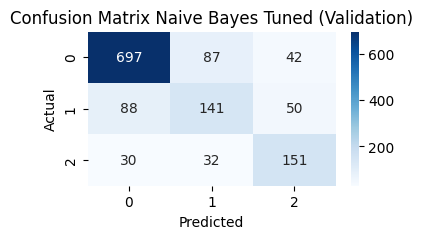




Accuracy of validation set (Naive Bayes Tuned): 75.04%
Precision of validation set (Naive Bayes Tuned): 75.12%
Recall of validation set (Naive Bayes Tuned): 75.04%
F1 Score of validation set (Naive Bayes Tuned): 75.02%


In [26]:
# Evaluate on validation set
y_val_pred_nb = best_model_nb.predict(X_validation)

# Calculate metrics
nb_val_accuracy = accuracy_score(y_validation, y_val_pred_nb) * 100
nb_val_precision = precision_score(y_validation, y_val_pred_nb, average='weighted') * 100
nb_val_recall = recall_score(y_validation, y_val_pred_nb, average='weighted') * 100
nb_val_f1 = f1_score(y_validation, y_val_pred_nb, average='weighted') * 100

print("\n")

# Confusion Matrix
cm_nb = confusion_matrix(y_validation, y_val_pred_nb)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Naive Bayes Tuned (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print accuracy, precision, recall, and F1 score
print("\nAccuracy of validation set (Naive Bayes Tuned): {:.2f}%".format(nb_val_accuracy))
print("Precision of validation set (Naive Bayes Tuned): {:.2f}%".format(nb_val_precision))
print("Recall of validation set (Naive Bayes Tuned): {:.2f}%".format(nb_val_recall))
print("F1 Score of validation set (Naive Bayes Tuned): {:.2f}%".format(nb_val_f1))

**Tuned Model Evaluation on Test Data**

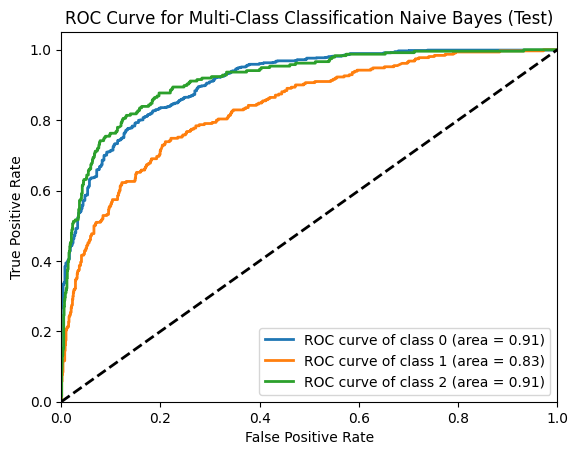




Classification Report for Naive Bayes Tuned (Test):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       826
           1       0.54      0.51      0.52       279
           2       0.62      0.71      0.66       213

    accuracy                           0.75      1318
   macro avg       0.67      0.69      0.68      1318
weighted avg       0.75      0.75      0.75      1318





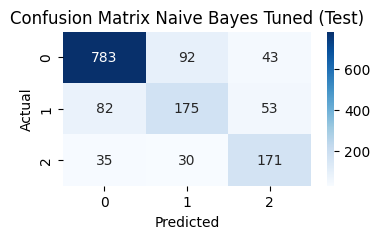




Accuracy of test set (Naive Bayes Tuned): 77.12%
Precision of test set (Naive Bayes Tuned): 77.35%
Recall of test set (Naive Bayes Tuned): 77.12%
F1 Score of test set (Naive Bayes Tuned): 77.18%
Mean ROC AUC Score test set (Naive Bayes Tuned): 88.58%


In [62]:
# Evaluate on validation set
y_test_pred_nb = best_model_nb.predict(X_test)

# Calculate metrics
nb_test_accuracy = accuracy_score(y_test, y_test_pred_nb) * 100
nb_test_precision = precision_score(y_test, y_test_pred_nb, average='weighted') * 100
nb_test_recall = recall_score(y_test, y_test_pred_nb, average='weighted') * 100
nb_test_f1 = f1_score(y_test, y_test_pred_nb, average='weighted') * 100

# Binarize the output labels for each class for ROC computation
y_test_binarized_nb = label_binarize(y_test, classes=np.unique(y_test))
n_classes_nb_test = y_test_binarized_nb.shape[1]

# Get the probability predictions for each class
y_scores_nb_test = best_model_nb.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_nb_test = dict()
tpr_nb_test = dict()
roc_auc_nb_test = dict()

for i in range(n_classes_nb_test):
    fpr_nb_test[i], tpr_nb_test[i], _ = roc_curve(y_test_binarized_nb[:, i], y_scores_nb_test[:, i])
    roc_auc_nb_test[i] = auc(fpr_nb_test[i], tpr_nb_test[i])

# Calculate the mean ROC AUC score
mean_roc_auc_nb = np.mean(list(roc_auc_nb_test.values())) * 100

# Plotting
plt.figure()

for i, color in zip(range(n_classes_nb_test), colors):
    plt.plot(fpr_nb_test[i], tpr_nb_test[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_nb_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification Naive Bayes (Test)')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report
print("\nClassification Report for Naive Bayes Tuned (Test):")
print(classification_report(y_validation, y_val_pred_nb))

print("\n")

# Confusion Matrix
cm_nb_test = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_nb_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Naive Bayes Tuned (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print accuracy, precision, recall, and F1 score
print("\nAccuracy of test set (Naive Bayes Tuned): {:.2f}%".format(nb_test_accuracy))
print("Precision of test set (Naive Bayes Tuned): {:.2f}%".format(nb_test_precision))
print("Recall of test set (Naive Bayes Tuned): {:.2f}%".format(nb_test_recall))
print("F1 Score of test set (Naive Bayes Tuned): {:.2f}%".format(nb_test_f1))
print("Mean ROC AUC Score test set (Naive Bayes Tuned): {:.2f}%".format(mean_roc_auc_nb))

## **Ensemble Classifiers**

### **Random Forest**

**Untuned Model**

In [30]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_val_pred_rf_untuned = rf_model.predict(X_validation)
y_train_pred_rf_untuned = rf_model.predict(X_train)

# Updated evaluation metrics for Random Forest
rf_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_rf_untuned) * 100
rf_untuned_train_precision = precision_score(y_train, y_train_pred_rf_untuned, average='weighted') * 100
rf_untuned_train_recall = recall_score(y_train, y_train_pred_rf_untuned, average='weighted') * 100
rf_untuned_train_f1 = f1_score(y_train, y_train_pred_rf_untuned, average='weighted') * 100

rf_untuned_val_accuracy = accuracy_score(y_validation, y_val_pred_rf_untuned) * 100
rf_untuned_val_precision = precision_score(y_validation, y_val_pred_rf_untuned, average='weighted') * 100
rf_untuned_val_recall = recall_score(y_validation, y_val_pred_rf_untuned, average='weighted') * 100
rf_untuned_val_f1 = f1_score(y_validation, y_val_pred_rf_untuned, average='weighted') * 100

# Print the evaluation metrics for the Random Forest model
print(f"Accuracy of training set (Untuned RF): {rf_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned RF): {rf_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned RF): {rf_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned RF): {rf_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned RF): {rf_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned RF): {rf_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned RF): {rf_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned RF): {rf_untuned_val_f1:.2f}%")

Accuracy of training set (Untuned RF): 99.28%
Precision of training set (Untuned RF): 99.29%
Recall of training set (Untuned RF): 99.28%
F1 Score of training set (Untuned RF): 99.28%


Accuracy of validation set (Untuned RF): 75.42%
Precision of validation set (Untuned RF): 74.64%
Recall of validation set (Untuned RF): 75.42%
F1 Score of validation set (Untuned RF): 74.90%


**Hyperparameters Tuning**

In [31]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=kfold)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Cross Validation**

In [32]:
# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Perform cross-validation
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the results of cross-validation
print("Cross-Validation Scores for Best Random Forest Model:")
for i, score in enumerate(cv_scores_rf , 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"Average Score: {cv_scores_rf .mean():.4f}")
print(f"Standard Deviation of Scores: {cv_scores_rf .std():.4f}")

Cross-Validation Scores for Best Random Forest Model:
  Fold 1: 0.9298
  Fold 2: 0.9258
  Fold 3: 0.9193
  Fold 4: 0.9285
  Fold 5: 0.9247
Average Score: 0.9256
Standard Deviation of Scores: 0.0037


In [33]:
# Saving the model
dump(best_model_rf, 'randomforest_model.joblib')

['randomforest_model.joblib']

**Tuned Model Evaluation on Validation Data**

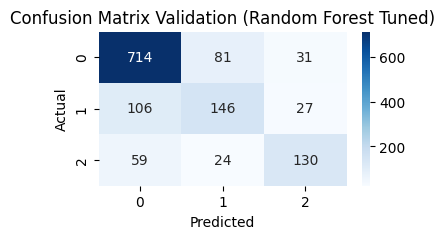




Accuracy of validation set (Random Forest Tuned): 75.11%
Precision of validation set (Random Forest Tuned): 74.39%
Recall of validation set (Random Forest Tuned): 75.11%
F1 Score of validation set (Random Forest Tuned): 74.63%


In [34]:
# Evaluate on validation set
y_val_pred_rf = best_model_rf.predict(X_validation)

# Calculate metrics
rf_val_accuracy = accuracy_score(y_validation, y_val_pred_rf) * 100
rf_val_precision = precision_score(y_validation, y_val_pred_rf, average='weighted') * 100
rf_val_recall = recall_score(y_validation, y_val_pred_rf, average='weighted') * 100
rf_val_f1 = f1_score(y_validation, y_val_pred_rf, average='weighted') * 100

print("\n")

# Confusion Matrix
cm_rf = confusion_matrix(y_validation, y_val_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Validation (Random Forest Tuned)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print accuracy, precision, recall, and F1 score
print("\nAccuracy of validation set (Random Forest Tuned): {:.2f}%".format(rf_val_accuracy))
print("Precision of validation set (Random Forest Tuned): {:.2f}%".format(rf_val_precision))
print("Recall of validation set (Random Forest Tuned): {:.2f}%".format(rf_val_recall))
print("F1 Score of validation set (Random Forest Tuned): {:.2f}%".format(rf_val_f1))

**Tuned Model Evaluation on Test Data**

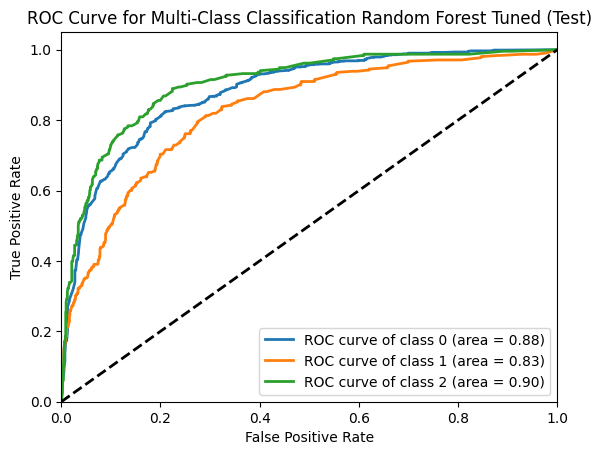




Classification Report for Random Forest Tuned (Test):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       918
           1       0.57      0.52      0.54       310
           2       0.64      0.61      0.62       236

    accuracy                           0.75      1464
   macro avg       0.68      0.66      0.67      1464
weighted avg       0.74      0.75      0.75      1464





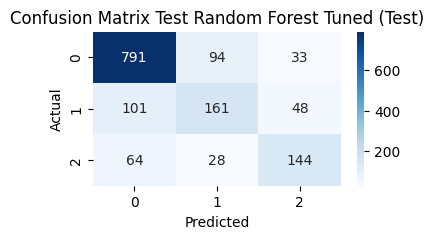




Accuracy of test set (Random Forest Tuned): 74.86%
Precision of test set (Random Forest Tuned): 74.25%
Recall of test set (Random Forest Tuned): 74.86%
F1 Score of test set (Random Forest Tuned): 74.50%
Mean ROC AUC Score of test set (Random Forest Tuned): 86.95%


In [63]:
# Evaluate on validation set
y_test_pred_rf = best_model_rf.predict(X_test)

# Calculate metrics
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf) * 100
rf_test_precision = precision_score(y_test, y_test_pred_rf, average='weighted') * 100
rf_test_recall = recall_score(y_test, y_test_pred_rf, average='weighted') * 100
rf_test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted') * 100

# Binarize the output labels for each class for ROC computation
y_test_binarized_rf = label_binarize(y_test, classes=np.unique(y_test))
n_classes_rf_test = y_test_binarized_rf.shape[1]

# Get the probability predictions for each class
y_scores_rf_test = best_model_rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_rf_test = dict()
tpr_rf_test = dict()
roc_auc_rf_test = dict()

for i in range(n_classes_rf_test):
    fpr_rf_test[i], tpr_rf_test[i], _ = roc_curve(y_test_binarized_rf[:, i], y_scores_rf_test[:, i])
    roc_auc_rf_test[i] = auc(fpr_rf_test[i], tpr_rf_test[i])

# Calculate the mean ROC AUC score
mean_roc_auc_rf = np.mean(list(roc_auc_rf_test.values())) * 100

# Plotting
plt.figure()

for i, color in zip(range(n_classes_rf_test), colors):
    plt.plot(fpr_rf_test[i], tpr_rf_test[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_rf_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification Random Forest Tuned (Test)')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report
print("\nClassification Report for Random Forest Tuned (Test):")
print(classification_report(y_test, y_test_pred_rf))

print("\n")

# Confusion Matrix
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Test Random Forest Tuned (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print accuracy, precision, recall, and F1 score
print("\nAccuracy of test set (Random Forest Tuned): {:.2f}%".format(rf_test_accuracy))
print("Precision of test set (Random Forest Tuned): {:.2f}%".format(rf_test_precision))
print("Recall of test set (Random Forest Tuned): {:.2f}%".format(rf_test_recall))
print("F1 Score of test set (Random Forest Tuned): {:.2f}%".format(rf_test_f1))
print("Mean ROC AUC Score of test set (Random Forest Tuned): {:.2f}%".format(mean_roc_auc_rf))

### **Gradient Boosting (XGBoost)**

**Untuned Model**

In [36]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_val_pred_xgb_untuned = xgb_model.predict(X_validation)
y_train_pred_xgb_untuned = xgb_model.predict(X_train)

# Updated evaluation metrics for XGBoost
xgb_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_xgb_untuned) * 100
xgb_untuned_train_precision = precision_score(y_train, y_train_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_train_recall = recall_score(y_train, y_train_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_train_f1 = f1_score(y_train, y_train_pred_xgb_untuned, average='weighted') * 100

xgb_untuned_val_accuracy = accuracy_score(y_validation, y_val_pred_xgb_untuned) * 100
xgb_untuned_val_precision = precision_score(y_validation, y_val_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_val_recall = recall_score(y_validation, y_val_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_val_f1 = f1_score(y_validation, y_val_pred_xgb_untuned, average='weighted') * 100

# Print the evaluation metrics for the XGBoost model
print(f"Accuracy of training set (Untuned XGB): {xgb_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned XGB): {xgb_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned XGB): {xgb_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned XGB): {xgb_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned XGB): {xgb_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned XGB): {xgb_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned XGB): {xgb_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned XGB): {xgb_untuned_val_f1:.2f}%")

Accuracy of training set (Untuned XGB): 87.27%
Precision of training set (Untuned XGB): 88.08%
Recall of training set (Untuned XGB): 87.27%
F1 Score of training set (Untuned XGB): 87.33%


Accuracy of validation set (Untuned XGB): 73.67%
Precision of validation set (Untuned XGB): 77.06%
Recall of validation set (Untuned XGB): 73.67%
F1 Score of validation set (Untuned XGB): 74.69%


**Hyperparameters Tuning**

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'gamma': uniform(0, 0.2),
    
}

# Number of iterations for random search
n_iter_search = 20

random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=n_iter_search, cv=kfold, scoring='accuracy', random_state=42)

# Perform the random search
random_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for XGBoost: ", random_search_xgb.best_params_)

Best Parameters for XGBoost:  {'gamma': 0.07903004720036289, 'learning_rate': 0.28799765973813823, 'max_depth': 9, 'n_estimators': 147}


**Cross Validation**

In [38]:
# Get the best model
best_model_xgb = random_search_xgb.best_estimator_

# Perform cross-validation
cv_scores_xgb = cross_val_score(best_model_xgb, X_train, y_train, cv=kfold, scoring='accuracy')

# Print the results of cross-validation
print("Cross-Validation Scores for Best XGBoost Model:")
for i, score in enumerate(cv_scores_xgb , 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"Average Score: {cv_scores_xgb .mean():.4f}")
print(f"Standard Deviation of Scores: {cv_scores_xgb .std():.4f}")

Cross-Validation Scores for Best XGBoost Model:
  Fold 1: 0.8893
  Fold 2: 0.8814
  Fold 3: 0.8756
  Fold 4: 0.8805
  Fold 5: 0.8769
Average Score: 0.8807
Standard Deviation of Scores: 0.0048


In [39]:
# Saving the model
dump(best_model_xgb, 'xgboost_model.joblib')

['xgboost_model.joblib']

**Tuned Model Evaluation on Validation Data**

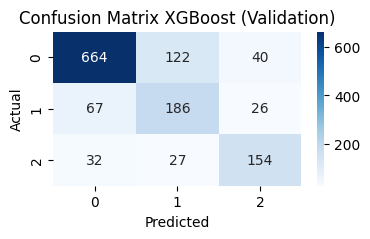




Accuracy of validation set (XGBoost): 76.18%
Precision of validation set (XGBoost): 77.60%
Recall of validation set (XGBoost): 76.18%
F1 Score of validation set (XGBoost): 76.70%


In [40]:
# Evaluate on validation set
y_val_pred_xgb = best_model_xgb.predict(X_validation)

# Calculate metrics
xgb_val_accuracy = accuracy_score(y_validation, y_val_pred_xgb) * 100
xgb_val_precision = precision_score(y_validation, y_val_pred_xgb, average='weighted') * 100
xgb_val_recall = recall_score(y_validation, y_val_pred_xgb, average='weighted') * 100
xgb_val_f1 = f1_score(y_validation, y_val_pred_xgb, average='weighted') * 100

# Confusion Matrix
cm_xgb = confusion_matrix(y_validation, y_val_pred_xgb)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGBoost (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print accuracy, precision, recall, and F1 score
print("\nAccuracy of validation set (XGBoost): {:.2f}%".format(xgb_val_accuracy))
print("Precision of validation set (XGBoost): {:.2f}%".format(xgb_val_precision))
print("Recall of validation set (XGBoost): {:.2f}%".format(xgb_val_recall))
print("F1 Score of validation set (XGBoost): {:.2f}%".format(xgb_val_f1))

**Tuned Model Evaluation on Test Data**

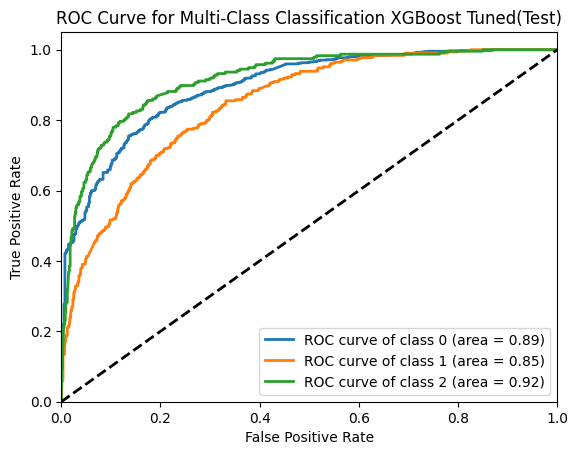




Classification Report for Tuned XGBoost (Test):
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       918
           1       0.52      0.65      0.58       310
           2       0.65      0.68      0.67       236

    accuracy                           0.75      1464
   macro avg       0.69      0.71      0.69      1464
weighted avg       0.77      0.75      0.75      1464





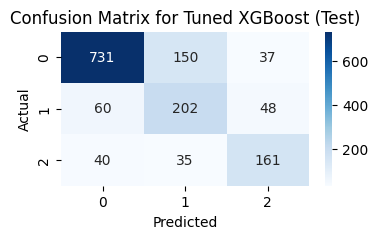




Accuracy of test set (XGBoost Tuned): 74.73%
Precision of test set (XGBoost Tuned): 76.76%
Recall of test set (XGBoost Tuned): 74.73%
F1 Score of test set (XGBoost Tuned): 75.46%
Mean ROC AUC Score of test set (XGBoost Tuned): 88.55%


In [64]:
# Evaluate on validation set
y_test_pred_xgb = best_model_xgb.predict(X_test)

# Calculate metrics
xgb_test_accuracy = accuracy_score(y_test, y_test_pred_xgb) * 100
xgb_test_precision = precision_score(y_test, y_test_pred_xgb, average='weighted') * 100
xgb_test_recall = recall_score(y_test, y_test_pred_xgb, average='weighted') * 100
xgb_test_f1 = f1_score(y_test, y_test_pred_xgb, average='weighted') * 100

# Binarize the output labels for each class for ROC computation
y_test_binarized_xgb = label_binarize(y_test, classes=np.unique(y_test))
n_classes_xgb_test = y_test_binarized_xgb.shape[1]

# Get the probability predictions for each class
y_scores_xgb_test = best_model_xgb.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_xgb_test = dict()
tpr_xgb_test = dict()
roc_auc_xgb_test = dict()

for i in range(n_classes_xgb_test):
    fpr_xgb_test[i], tpr_xgb_test[i], _ = roc_curve(y_test_binarized_xgb[:, i], y_scores_xgb_test[:, i])
    roc_auc_xgb_test[i] = auc(fpr_xgb_test[i], tpr_xgb_test[i])

# Calculate the mean ROC AUC score
mean_roc_auc_xgb = np.mean(list(roc_auc_xgb_test.values())) * 100

# Plotting
plt.figure()

for i, color in zip(range(n_classes_xgb_test), colors):
    plt.plot(fpr_xgb_test[i], tpr_xgb_test[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_xgb_test[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification XGBoost Tuned(Test)')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report
print("\nClassification Report for Tuned XGBoost (Test):")
print(classification_report(y_test, y_test_pred_xgb))

print("\n")

# Confusion Matrix
cm_xgb_test = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_xgb_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned XGBoost (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print accuracy, precision, recall, and F1 score
print("\nAccuracy of test set (XGBoost Tuned): {:.2f}%".format(xgb_test_accuracy))
print("Precision of test set (XGBoost Tuned): {:.2f}%".format(xgb_test_precision))
print("Recall of test set (XGBoost Tuned): {:.2f}%".format(xgb_test_recall))
print("F1 Score of test set (XGBoost Tuned): {:.2f}%".format(xgb_test_f1))
print("Mean ROC AUC Score of test set (XGBoost Tuned): {:.2f}%".format(mean_roc_auc_xgb))

## **Deep Learning Classifiers**

Below I am preparing the text data for neural network models that follows (CNN and LSTM). It first converts text into sequences of numbers (tokenization), ensuring each sequence is the same length (padding). Then, it changes text labels into a numerical format suitable for these models. This process is essential for training neural networks to understand and classify text data accurately.

In [42]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(df_upsampled['text'])

X_train_seq = tokenizer.texts_to_sequences(df_upsampled['text'])
X_train_pad = pad_sequences(X_train_seq, maxlen=100) 

X_val_seq = tokenizer.texts_to_sequences(tweets_validation['text'])
X_val_pad = pad_sequences(X_val_seq, maxlen=100)

X_test_seq = tokenizer.texts_to_sequences(tweets_test['text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_categorical = to_categorical(y_train_encoded)

y_val_encoded = label_encoder.transform(y_validation)
y_val_categorical = to_categorical(y_val_encoded)

y_test_encoded = label_encoder.transform(y_test)
y_test_categorical = to_categorical(y_test_encoded)

Here I am about to create two deep learning classifiers using LSTM and CNN architectures, tailored to the unique characteristics of neural networks. The approach differs significantly from how I handle shallow and ensemble classifiers. To start, I've crafted a function that constructs the neural network models, allowing for a range of hyperparameters to be adjusted.

To identify the best combination of these hyperparameters, I'm employing RandomSearch, a method that iteratively tests different hyperparameter configurations. This process is enhanced with cross-validation, ensuring a thorough and unbiased evaluation of each model variation. Importantly, I've chosen to focus on minimizing the validation loss (val_loss) rather than maximizing validation accuracy (val_accuracy). This decision stems from a strategic goal to enhance the model's ability to perform well on new, unseen data, under the premise that a lower loss indicates a more generalizable and robust model.

Once the RandomSearch identifies the model with the lowest validation loss, I proceed to a critical phase of evaluating this optimal model's performance. This evaluation is conducted first on the validation data, providing a measure of how well the model generalizes beyond its training set. Subsequently, the model is tested on completely unseen test data, offering a true test of its predictive capabilities in real-world scenarios. 

### **Long Short Term Memory (LSTM)**

In [43]:
# LSTM Model Builder Function
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=7000, output_dim=hp.Int('embedding_output_dim', min_value=32, max_value=128, step=32), input_length=100))
    model.add(SpatialDropout1D(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Tuner
lstm_tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=3,
    directory='lstm_tuning',
    project_name='keras_lstm_tuning'
)

# LSTM K-Fold Cross Validation
for train, val in kfold.split(X_train_pad, y_train_categorical):
    lstm_tuner.search(X_train_pad[train], y_train_categorical[train], epochs=15, validation_data=(X_train_pad[val], y_train_categorical[val]))

# Get the best LSTM model
best_lstm_model = lstm_tuner.get_best_models(num_models=1)[0]

# Train the best LSTM model
history_lstm = best_lstm_model.fit(X_train_pad, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_val_pad, y_val_categorical))

Reloading Tuner from lstm_tuning\keras_lstm_tuning\tuner0.json
Epoch 1/50
697/697 [==============================] - 14s 13ms/step - loss: 0.1773 - accuracy: 0.9414 - val_loss: 0.9303 - val_accuracy: 0.7443
Epoch 2/50
697/697 [==============================] - 9s 14ms/step - loss: 0.1515 - accuracy: 0.9502 - val_loss: 1.0247 - val_accuracy: 0.7451
Epoch 3/50
697/697 [==============================] - 10s 14ms/step - loss: 0.1347 - accuracy: 0.9554 - val_loss: 1.0940 - val_accuracy: 0.7443
Epoch 4/50
697/697 [==============================] - 9s 12ms/step - loss: 0.1223 - accuracy: 0.9596 - val_loss: 1.1392 - val_accuracy: 0.7360
Epoch 5/50
697/697 [==============================] - 10s 15ms/step - loss: 0.1114 - accuracy: 0.9631 - val_loss: 1.1749 - val_accuracy: 0.7261
Epoch 6/50
697/697 [==============================] - 10s 14ms/step - loss: 0.1062 - accuracy: 0.9656 - val_loss: 1.1944 - val_accuracy: 0.7329
Epoch 7/50
697/697 [==============================] - 9s 14ms/step - loss: 

**Evaluation on Validation Data**

42/42 [==============================] - 1s 7ms/step




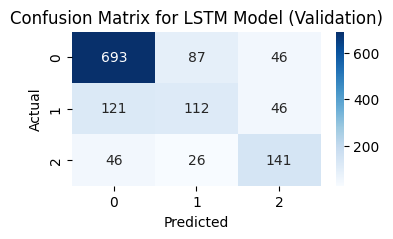



LSTM Model Evaluation Metrics (Validation):
Precision: 70.82%
Recall: 71.78%
F1 Score: 71.15%
Accuracy: 71.78%


In [44]:
# Evaluate LSTM model
y_val_pred_lstm = best_lstm_model.predict(X_val_pad)

# Convert predictions to one-hot encoded labels for evaluation
y_val_pred_lstm_labels = np.argmax(y_val_pred_lstm, axis=1)

# Calculate metrics for LSTM
precision_lstm = precision_score(y_val_encoded, y_val_pred_lstm_labels, average='weighted')
recall_lstm = recall_score(y_val_encoded, y_val_pred_lstm_labels, average='weighted')
f1_lstm = f1_score(y_val_encoded, y_val_pred_lstm_labels, average='weighted')
accuracy_lstm = accuracy_score(y_val_encoded, y_val_pred_lstm_labels)

print("\n")

# Calculate confusion matrix
cm_lstm = confusion_matrix(y_val_encoded, y_val_pred_lstm_labels)

# Plotting using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print the results
print(f"LSTM Model Evaluation Metrics (Validation):")
print(f"Precision: {precision_lstm * 100:.2f}%")
print(f"Recall: {recall_lstm * 100:.2f}%")
print(f"F1 Score: {f1_lstm * 100:.2f}%")
print(f"Accuracy: {accuracy_lstm * 100:.2f}%")

**Evaluation on Test Data**

 1/46 [..............................] - ETA: 1s

46/46 [==============================] - 0s 8ms/step


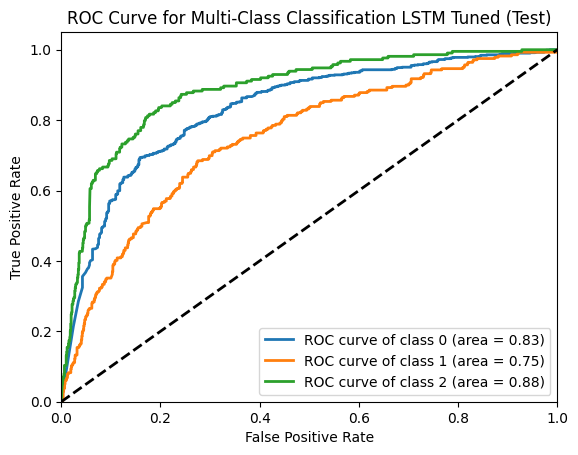




LSTM Model Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       918
           1       0.53      0.49      0.51       310
           2       0.59      0.62      0.60       236

    accuracy                           0.73      1464
   macro avg       0.65      0.65      0.65      1464
weighted avg       0.73      0.73      0.73      1464





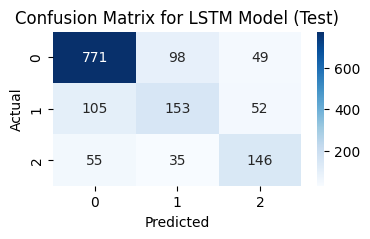



LSTM Model Evaluation Metrics (Test):
Accuracy: 73.09%
Precision: 72.78%
Recall: 73.09%
F1 Score: 72.91%
Mean ROC AUC Score for LSTM Model: 82.12%


In [65]:
# Evaluate LSTM model
y_test_pred_lstm = best_lstm_model.predict(X_test_pad)

# Convert predictions to one-hot encoded labels for evaluation
y_test_pred_lstm_labels = np.argmax(y_test_pred_lstm, axis=1)

# Calculate metrics for LSTM
precision_lstm_test = precision_score(y_test_encoded, y_test_pred_lstm_labels, average='weighted')
recall_lstm_test = recall_score(y_test_encoded, y_test_pred_lstm_labels, average='weighted')
f1_lstm_test = f1_score(y_test_encoded, y_test_pred_lstm_labels, average='weighted')
accuracy_lstm_test = accuracy_score(y_test_encoded, y_test_pred_lstm_labels)

n_classes_lstm = y_val_pred_lstm.shape[1]

# Binarize the validation labels
y_val_binarized_lstm = label_binarize(y_val_encoded, classes=range(n_classes_lstm))

# Compute ROC curve and ROC area for each class
fpr_lstm = dict()
tpr_lstm = dict()
roc_auc_lstm = dict()

for i in range(n_classes_lstm):
    fpr_lstm[i], tpr_lstm[i], _ = roc_curve(y_val_binarized_lstm[:, i], y_val_pred_lstm[:, i])
    roc_auc_lstm[i] = auc(fpr_lstm[i], tpr_lstm[i])

# Calculate the mean ROC AUC score
mean_roc_auc_lstm = np.mean(list(roc_auc_lstm.values())) * 100

plt.figure()

for i, color in zip(range(n_classes_lstm), colors):
    plt.plot(fpr_lstm[i], tpr_lstm[i], color=color, lw=2, 
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_lstm[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification LSTM Tuned (Test)')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Calculate and print the classification report
report_lstm_test = classification_report(y_test_encoded, y_test_pred_lstm_labels)
print("\nLSTM Model Classification Report (Test):")
print(report_lstm_test)

print("\n")

# Calculate confusion matrix
cm_lstm_test = confusion_matrix(y_test_encoded, y_test_pred_lstm_labels)

# Plotting using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lstm_test, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print the results
print(f"LSTM Model Evaluation Metrics (Test):")
print(f"Accuracy: {accuracy_lstm_test * 100:.2f}%")
print(f"Precision: {precision_lstm_test * 100:.2f}%")
print(f"Recall: {recall_lstm_test * 100:.2f}%")
print(f"F1 Score: {f1_lstm_test * 100:.2f}%")
print(f"Mean ROC AUC Score for LSTM Model: {mean_roc_auc_lstm :.2f}%")

### **Convolutional Neural Networks (CNN)**

In [50]:
# CNN Model Builder Function
def build_cnn_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=7000, output_dim=hp.Int('embedding_output_dim', min_value=32, max_value=128, step=32), input_length=100))
    model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5, 7]),
                     activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN Tuner
cnn_tuner = RandomSearch(
    build_cnn_model,
    objective='val_loss',
    max_trials=3,
    executions_per_trial=3,
    directory='cnn_tuning',
    project_name='keras_cnn_tuning'
)

# CNN K-Fold Cross Validation
for train, val in kfold.split(X_train_pad, y_train_categorical):
    cnn_tuner.search(X_train_pad[train], y_train_categorical[train], epochs=15, validation_data=(X_train_pad[val], y_train_categorical[val]))

# Get the best CNN model
best_cnn_model = cnn_tuner.get_best_models(num_models=1)[0]

# Train the best CNN model
history_cnn = best_cnn_model.fit(X_train_pad, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_val_pad, y_val_categorical))

Reloading Tuner from cnn_tuning\keras_cnn_tuning\tuner0.json
Epoch 1/50
697/697 [==============================] - 6s 5ms/step - loss: 0.0954 - accuracy: 0.9728 - val_loss: 0.9728 - val_accuracy: 0.7458
Epoch 2/50
697/697 [==============================] - 3s 5ms/step - loss: 0.0488 - accuracy: 0.9857 - val_loss: 1.0878 - val_accuracy: 0.7511
Epoch 3/50
697/697 [==============================] - 3s 4ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 1.1836 - val_accuracy: 0.7496
Epoch 4/50
697/697 [==============================] - 3s 4ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 1.2565 - val_accuracy: 0.7504
Epoch 5/50
697/697 [==============================] - 3s 4ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 1.3350 - val_accuracy: 0.7436
Epoch 6/50
697/697 [==============================] - 3s 4ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 1.3890 - val_accuracy: 0.7436
Epoch 7/50
697/697 [==============================] - 3s 5ms/step - loss: 0.0274 - accu

**Evaluation on Validation Data**

 1/42 [..............................] - ETA: 0s

42/42 [==============================] - 0s 3ms/step




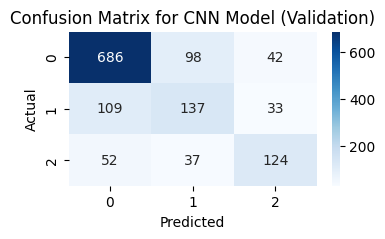



CNN Model Evaluation Metrics (Validation):
Precision: 71.49%
Recall: 71.85%
F1 Score: 71.65%
Accuracy: 71.85%


In [66]:
# Evaluate CNN model
y_val_pred_cnn = best_cnn_model.predict(X_val_pad)

# Convert predictions to one-hot encoded labels for evaluation
y_val_pred_cnn_labels = np.argmax(y_val_pred_cnn, axis=1)

# Calculate metrics for CNN
precision_cnn = precision_score(y_val_encoded, y_val_pred_cnn_labels, average='weighted')
recall_cnn = recall_score(y_val_encoded, y_val_pred_cnn_labels, average='weighted')
f1_cnn = f1_score(y_val_encoded, y_val_pred_cnn_labels, average='weighted')
accuracy_cnn = accuracy_score(y_val_encoded, y_val_pred_cnn_labels)

print("\n")

# Calculate confusion matrix
cm_cnn = confusion_matrix(y_val_encoded, y_val_pred_cnn_labels)

# Plotting using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for CNN Model (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print the results
print(f"CNN Model Evaluation Metrics (Validation):")
print(f"Precision: {precision_cnn  * 100:.2f}%")
print(f"Recall: {recall_cnn  * 100:.2f}%")
print(f"F1 Score: {f1_cnn  * 100:.2f}%")
print(f"Accuracy: {accuracy_cnn  * 100:.2f}%")

**Evaluation on Test Data**

 1/46 [..............................] - ETA: 0s

46/46 [==============================] - 0s 3ms/step


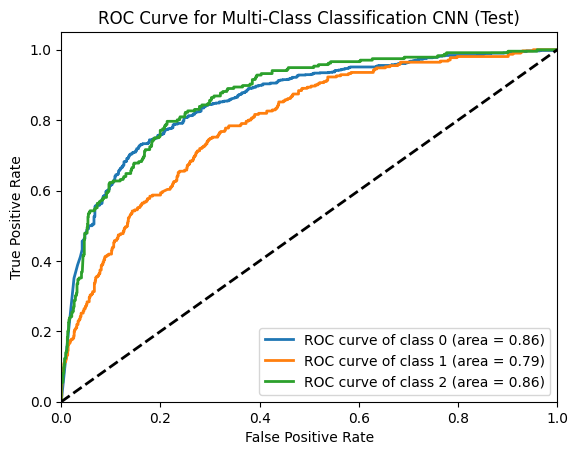




CNN Model Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       918
           1       0.50      0.54      0.52       310
           2       0.63      0.54      0.58       236

    accuracy                           0.73      1464
   macro avg       0.65      0.64      0.65      1464
weighted avg       0.73      0.73      0.73      1464





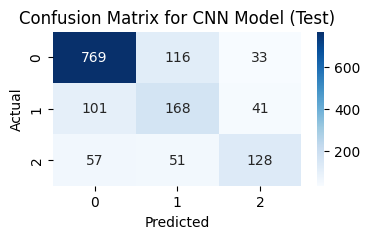



CNN Model Evaluation Metrics (Test):
Accuracy: 72.75%
Precision: 72.85%
Recall: 72.75%
F1 Score: 72.72%
Mean ROC AUC Score for CNN Model: 83.76%


In [67]:
# Evaluate CNN model
y_test_pred_cnn = best_cnn_model.predict(X_test_pad)

# Convert predictions to one-hot encoded labels for evaluation
y_test_pred_cnn_labels = np.argmax(y_test_pred_cnn, axis=1)

# Calculate metrics for CNN
precision_cnn_test = precision_score(y_test_encoded, y_test_pred_cnn_labels, average='weighted')
recall_cnn_test = recall_score(y_test_encoded, y_test_pred_cnn_labels, average='weighted')
f1_cnn_test = f1_score(y_test_encoded, y_test_pred_cnn_labels, average='weighted')
accuracy_cnn_test = accuracy_score(y_test_encoded, y_test_pred_cnn_labels)

n_classes_cnn = y_test_pred_cnn.shape[1]

# Binarize the test labels
y_test_binarized_cnn = label_binarize(y_test_encoded, classes=range(n_classes_cnn))

# Compute ROC curve and ROC area for each class
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()

for i in range(n_classes_cnn):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_test_binarized_cnn[:, i], y_test_pred_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

# Calculate the mean ROC AUC score
mean_roc_auc_cnn = np.mean(list(roc_auc_cnn.values()))

# Plotting Curves
plt.figure()

for i, color in zip(range(n_classes_cnn), colors):
    plt.plot(fpr_cnn[i], tpr_cnn[i], color=color, lw=2, 
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_cnn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification CNN (Test)')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Calculate and print the classification report
report_cnn_val = classification_report(y_test_encoded, y_test_pred_cnn_labels)
print("\nCNN Model Classification Report (Test):")
print(report_cnn_val)

print("\n")

# Calculate confusion matrix
cm_cnn_test = confusion_matrix(y_test_encoded, y_test_pred_cnn_labels)

# Plotting using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm_cnn_test, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for CNN Model (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print the results
print(f"CNN Model Evaluation Metrics (Test):")
print(f"Accuracy: {accuracy_cnn_test  * 100:.2f}%")
print(f"Precision: {precision_cnn_test  * 100:.2f}%")
print(f"Recall: {recall_cnn_test  * 100:.2f}%")
print(f"F1 Score: {f1_cnn_test  * 100:.2f}%")
print(f"Mean ROC AUC Score for CNN Model: {mean_roc_auc_cnn  * 100:.2f}%")

## **Classifiers Performance Evaluation**

In [58]:
# Create a dictionary with the metrics
metrics_test = {
    'Model': ['CNN', 'LSTM', 'XGBoost', 'Random Forest', 'Naive Bayes', 'Logistic Regression'],
    'F1 Score (%)': [f1_cnn_test * 100, f1_lstm_test * 100, xgb_test_f1, rf_test_f1, nb_test_f1, lr_test_f1],
    'Accuracy (%)': [accuracy_cnn_test * 100, accuracy_lstm_test * 100, xgb_test_accuracy, rf_test_accuracy, nb_test_accuracy, lr_test_accuracy],
    'Precision (%)': [precision_cnn_test * 100, precision_lstm_test * 100, xgb_test_precision, rf_test_precision, nb_test_precision, lr_test_precision],
    'Recall (%)': [recall_cnn_test * 100, recall_lstm_test * 100, xgb_test_recall, rf_test_recall, nb_test_recall, lr_test_recall],
    'ROC AUC (%)': [mean_roc_auc_cnn * 100, mean_roc_auc_lstm, mean_roc_auc_xgb * 100, mean_roc_auc_rf, mean_roc_auc_nb, mean_roc_auc_lr]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_test).sort_values(by='F1 Score (%)', ascending=False)

# Convert the DataFrame to HTML
html = metrics_df.to_html(index=False)

# Custom CSS to style the table and caption
css = """
<style type='text/css'>
    .dataframe th, .dataframe td {
        text-align: left;
    }

    .dataframe th:first-child { 
        text-align: left; 
    }

    #caption {
        font-size: 24px;
        font-weight: bold;
        color: white;
        text-align: left;
        margin-bottom: 10px;
    }
    
</style>
"""

# Custom HTML for the caption
caption_html = "<div id='caption'>Final Models Evaluation - Test Set</div>"

# Combine CSS, caption HTML, and DataFrame HTML
html_styled = css + caption_html + html

# To display in Jupyter Notebook
from IPython.core.display import HTML
HTML(html_styled)


Model,F1 Score (%),Accuracy (%),Precision (%),Recall (%),ROC AUC (%)
Naive Bayes,77.183173,77.117486,77.354235,77.117486,88.582457
Logistic Regression,76.373464,75.683060,77.536907,75.683060,88.384008
XGBoost,75.458062,74.726776,76.761937,74.726776,88.548583
Random Forest,74.503213,74.863388,74.245833,74.863388,86.952710
LSTM,72.910878,73.087432,72.784924,73.087432,82.116503
CNN,72.723581,72.745902,72.851176,72.745902,83.760951


### **About Metrics**

**F1 Score**: The F1 Score is the weighted average of Precision and Recall. It is a more reliable measure than accuracy, especially with uneven class distribution, as it takes both false positives and false negatives into account.

**Accuracy**: This metric represents the overall correctness of the model, defined as the proportion of true results (both true positives and true negatives) among the total number of cases examined. A higher accuracy indicates that the model can correctly classify a higher percentage of instances.

**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false-positive rate.

**Recall**: Also known as sensitivity, recall is the ratio of correctly predicted positive observations to all observations in the actual class. It's crucial in cases where missing a positive instance is more detrimental than falsely labeling negative instances as positive.

**ROC AUC**: The ROC AUC score measures a model's ability to differentiate between classes. An AUC score of 1 indicates perfect classification, while 0.5 suggests no better than random guessing.

### **Models Performance**

Naive Bayes emerges as the most effective model, not only excelling in traditional metrics like F1 Score, Accuracy, Precision, and Recall, but also achieving the highest ROC AUC score. This high ROC AUC value underscores its superior ability in class distinction, making it particularly effective for this dataset and problem. Logistic Regression follows closely, showcasing competitive results, particularly in Precision and F1 Score. Its high ROC AUC score further attests to its strong classification abilities and its proficiency in differentiating between classes, a crucial aspect in balanced decision-making. XGBoost, while not leading in any single metric, displays a harmonious balance across all, including a commendable ROC AUC score. This indicates its overall robustness and effectiveness in a variety of scenarios, making it a reliable choice for diverse data conditions. Random Forest, though slightly lagging in some metrics, still presents a notable ROC AUC score. This suggests its competence in classification tasks, particularly in distinguishing between different classes, a key strength in handling varied datasets. The LSTM model, known for its prowess in processing sequential data, seems to face challenges in this context, as reflected in its lower scores across the board, including ROC AUC. This might point to its limitations in capturing the nuances of this particular dataset. The CNN model, typically strong in feature extraction, ranks lowest in this evaluation. Despite a moderately good ROC AUC score, its overall performance across other metrics suggests that its convolutional approach may not be entirely suited to the characteristics of this dataset or problem.

### **Confusion Matrix Evaluation**


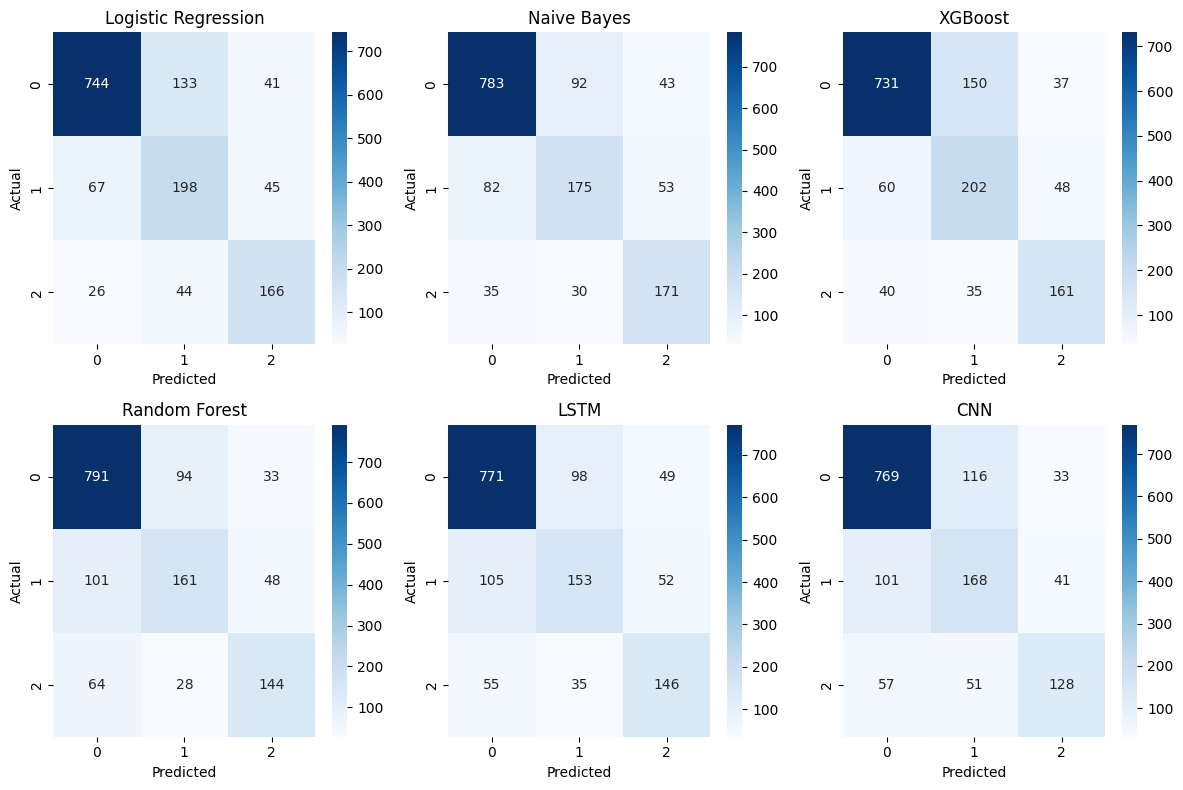

In [59]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Titles for each subplot
titles = ['Logistic Regression', 'Naive Bayes', 'XGBoost', 'Random Forest', 'LSTM', 'CNN']

# List of confusion matrices
confusion_matrices = [cm_lr_2, cm_nb_test, cm_xgb_test, cm_rf_test, cm_lstm_test, cm_cnn_test]

for ax, cm, title in zip(axes.flatten(), confusion_matrices, titles):
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

Starting with Logistic Regression, it shines in identifying Class 0 but stumbles when dealing with Classes 1 and 2, where misclassifications become more apparent. Naive Bayes follows a similar trend, excelling with Class 0 thanks to high true positives, but it slightly falters in handling Classes 1 and 2, as indicated by an uptick in false positives and negatives. XGBoost, not to be outdone, also shows a strong affinity for Class 0, paralleling the pattern seen in Logistic Regression, yet it too grapples with more noticeable misclassifications in the remaining classes. Random Forest, on the other hand, emerges as a more balanced contender. It not only achieves the highest true positives for Class 0 but also maintains a more even-handed performance with Classes 1 and 2, even though misclassifications are still a factor. 

Transitioning to the LSTM model, we observe a consistent performance across all classes. However, this model slightly leans towards more misclassifications in Classes 1 and 2 compared to Class 0. CNN mirrors this balanced yet imperfect approach, showing a reasonable performance across the board but with a spread of misclassifications across all classes.

Overall, all models demonstrated their best performance in classifying Class 0, but encountered difficulties with Classes 1 and 2. This pattern might indicate either inherent similarities between Classes 1 and 2 that complicate their distinction, or it may highlight a need for refined feature engineering or model optimization to more effectively discern the subtleties of these classes.

**WORD COUNT OF PROJECT (3) : 2109**